[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Pyrcel/example_basic_run.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Pyrcel/example_basic_run.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Pyrcel/example_basic_run.ipynb)

#### based on Example Figure from Pyrcel code documentation https://pyrcel.readthedocs.io/en/latest/examples/basic_run.html

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install "atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
from PySDM_examples.Pyrcel import Settings, Simulation
from PySDM_examples.Pyrcel.aerosol import AerosolMarine

from atmos_cloud_sim_uj_utils import show_plot

from PySDM.initialisation.sampling import spectral_sampling as spec_sampling
from PySDM.physics import si

import numpy as np
from matplotlib import pylab

In [3]:
aerosol = AerosolMarine()

output = {}
key = f"{aerosol.__class__.__name__}"
settings = Settings(
    dz=1*si.m,
    n_sd_per_mode=(200,40),
    aerosol=aerosol,
    spectral_sampling=spec_sampling.ConstantMultiplicity
)

simulation = Simulation(settings)
output[key] = simulation.run()

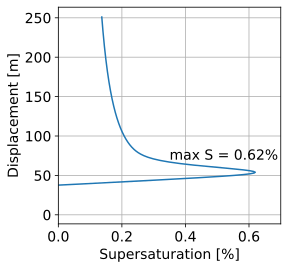

HTML(value="<a href='./supersaturation.pdf' target='_blank'>./supersaturation.pdf</a><br>")

In [4]:
pylab.rc('font', size=14)
fig, ax = pylab.subplots(1, 1, figsize=(4, 4), sharey=True)

var='S_max'
for key, out_item in output.items():
    Y = np.asarray(out_item['z'])
    ax.plot(out_item[var], Y, label=key, linestyle='-')
    peakSS = np.nanmax(out_item[var])

ax.set_ylabel('Displacement [m]')
ax.set_xlabel('Supersaturation [%]')
ax.set_xlim(0, 0.7)
ax.text(0.35,70,f"max S = {peakSS:.2f}%")
  
ax.grid()
show_plot("supersaturation.pdf")

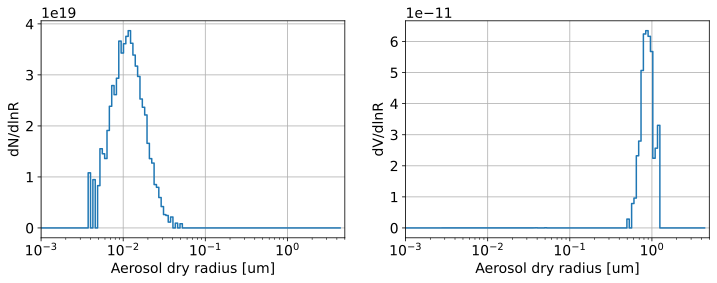

HTML(value="<a href='./size_dist.pdf' target='_blank'>./size_dist.pdf</a><br>")

In [5]:
from scipy.ndimage.filters import uniform_filter1d

pylab.rc('font', size=14)
fig, axs = pylab.subplots(1, 2, figsize=(12, 4), sharex=True)
for i, name in enumerate(["dry size spectrum","dV/dlnR",]):
    for key, out_item in output.items():
        if name == "dry size spectrum":
            spec = out_item[name][0] / np.diff(np.log(settings.dry_radius_bins_edges))
            name = "dN/dlnR"
        else:
            spec = out_item[name][0]
        axs[i].step(
            settings.dry_radius_bins_edges[:-1] / si.um,
            uniform_filter1d(spec, size=1),
            where='pre'
        )
        axs[i].set_ylabel(name)
        axs[i].set_xlabel("Aerosol dry radius [um]")
        axs[i].grid()
pylab.xscale('log')
pylab.xlim(1e-3, 5e0)

show_plot("size_dist.pdf")